<a href="https://colab.research.google.com/github/spexdj/Data_Science_I/blob/main/ProyectoDS_ParteI_%2BLicastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primera Entrega Trabajo Final**

###Consigna:

Continuarás trabajando con base en lo realizado en la actividades práctica: Visualización en Python, en esta oportunidad deberás complementar con lo siguiente:
1. Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
2. Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
3. Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
4. Identificar valores perdidos.

In [18]:
#Importamos las liberías a utilizar para el TP:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Importamos el dataset
data = pd.read_csv('https://raw.githubusercontent.com/spexdj/Data_Science_I/refs/heads/main/superstore3.csv')

#Verificamos la cantidad de registros, columnas y el nombre de cada una de ellas del dataset antes de comenzar:
num_rows, num_columns = data.shape
print(f"El dataset tiene {num_rows} registros y {num_columns} columnas.")

print("#####################################")

column_names = data.columns
print("Nombres de las columnas:")
print(column_names)

print("#####################################")

# Resumen detallado del dataset
data.info()

# Chequeo de variables
Resumen=data.describe().round(1)
Resumen

El dataset tiene 51290 registros y 26 columnas.
#####################################
Nombres de las columnas:
Index(['Customer.ID', 'Customer.Name', 'Category', 'City', 'Country',
       'Discount', 'Market', 'Order.Date', 'Order.Time', 'Order.ID',
       'Order.Priority', 'Product.ID', 'Product.Name', 'Sales.Price',
       'Quantity', 'Region', 'ItemsSale.Count', 'Sales.Total', 'Segment',
       'Ship.Date', 'Ship_Time', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year'],
      dtype='object')
#####################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer.ID      51290 non-null  object 
 1   Customer.Name    51290 non-null  object 
 2   Category         51290 non-null  object 
 3   City             51290 non-null  object 
 4   Country          51290 non-null  object 
 5   Discou

,Sales.Price,Quantity,ItemsSale.Count,Shipping.Cost,Year
count,51290.0,51290.0,51290.0,51290.0,51290.0
mean,28.6,3.5,246.5,26.4,2012.8
std,174.3,2.3,487.6,57.3,1.1
min,-6600.0,1.0,0.0,0.0,2011.0
25%,0.0,2.0,31.0,2.6,2012.0
50%,9.2,3.0,85.0,7.8,2013.0
75%,36.8,5.0,251.0,24.4,2014.0
max,8400.0,14.0,22638.0,933.6,2014.0


#####################################

El dataset tiene 51,290 registros y 27 columnas, incluyendo datos de clientes, productos, órdenes, envíos y ubicación geográfica. Algunas columnas relevantes incluyen:

Datos de clientes: Customer.ID, Customer.Name, Segment

Datos de productos: Category, Sub.Category, Product.ID, Product.Name

Datos de órdenes: Order.ID, Order.Date, Order.Priority, Sales.Total, Quantity

Datos de envío: Ship.Date, Ship.Mode, Shipping.Cost, Shipping.TotalCost

Datos geográficos: City, State, Country, Region, Market


Por otro lado, observamos en el valor mínimo un monto negativo en ventas, es probable que esto se deba a devoluciones de operaciones por parte de la empresa. Para no sezgar y modificar a mano, algo que podría alterar el análisis en general, opté por no eliminar esas operaciones,no obstante más adelante realizaré un análisis sin esas operaciones para ver como cambia el quinto gráfico que claramente muestra estos resultados atípicos.
#####################################

### 1. Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.

*   ¿Existen categorías de productos con ventas significativamente mayores que otras?

*   ¿Qué relación hay entre el segmento de clientes y el volumen de ventas o las ganancias?

*   ¿Qué mercados o regiones muestran mayores costos de envío?

*   ¿La prioridad de las órdenes afecta el costo de envío o el tiempo de entrega?

*   ¿Qué tipo de envío es el que tiene el mayor costo?

*   ¿Cuál es el cliente que mayor volúmen de ventas posee?

### 4. Identificar valores perdidos.
Con motivo de poder avanzar en el análisis de la información y la creación de los gráficos opte por identificar valores perdidos en este momento, con el objeto de poder reemplazarlos de ser necesario, completarlos o eliminarlos llegado el caso. Para ello a continuación utilizaré los siguientes comandos en Python:

In [2]:
# Revisar el total de valores nulos por columna: Utilizando el método isnull()
# en combinación con sum() para contar cuántos valores nulos existen en cada
# columna.

# Verificar valores nulos en cada columna
missing_values = data.isnull().sum()

# Ver columnas con valores nulos
missing_values_nonzero = missing_values[missing_values > 0]
print("Columnas con valores perdidos:")
print(missing_values_nonzero)

# También podemos usar el método de arriba data.info() y ver visualmente por
# columna si hay valores nulos, pero como pudimos ver anteriormente, no los hay,
# ya que el dataset se encuentra completo en sus campos.

Columnas con valores perdidos:
Series([], dtype: int64)


Otra forma de verificar los valores nulos es con utilización de numpy:

In [3]:
# Verificando si hay algún valor nulo en el dataset
any_nulls = np.any(data.isnull())
print("¿Hay valores nulos en el dataset?", any_nulls)

¿Hay valores nulos en el dataset? False


###2. Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.

####Primer Gráfico
El primer gráfico con el que voy a trabajar es el de barras para comparar las ventas con las categorías de productos. Es importante aclarar que este gráfico nos ayudará a responder la pregunta: "¿Existen categorías de productos con ventas significativamente mayores que otras?", para ellos realizamos lo siguiente:

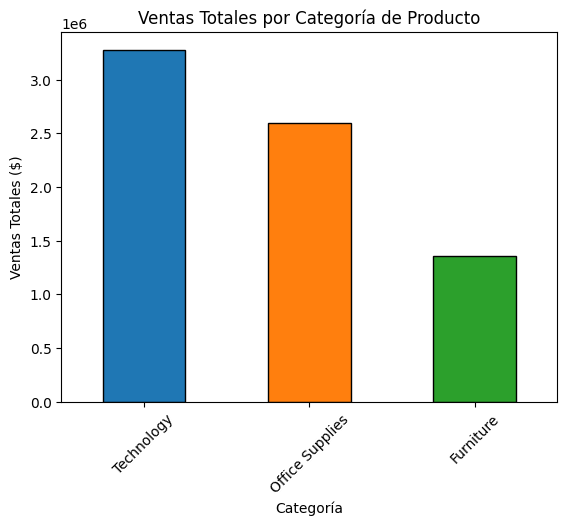

In [5]:
# Conversión de Sales.Total a formato numérico (quitando el signo de la moneda y comas)
data['Sales.Total'] = data['Sales.Total'].replace('[\$,]', '', regex=True).astype(float)

# Agrupando y sumando las ventas por categorías de productos
sales_by_category = data.groupby('Category')['Sales.Total'].sum().sort_values(ascending=False)

# Lista de colores personalizada
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(sales_by_category)]

# Gráfico de barras
sales_by_category.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)
plt.show()

Del gráfico se desprende visualmente que la categoría "Technology" se impone por sobre "Office Supplies" y sobre "Furniture". Esto puede deberse a diferentes factores que deberían analizarse más en profundidad, sin embargo, nos arroja un dato importante que es conocer la categoría que mas ventas genera de la empresa bajo análisis con el fin de potenciar las otras categorías a través de mejoras en sus canales de ventas o hasta publicidad, o de dedicarle más inversión publicitaria por ejemplo a "Technology" ya que sabemos que esas ventas se incrementarán automáticamente casi sin esfuerzo.

####Segundo Gráfico
El segundo gráfico a realizar es el gráfico de torta que lo utilizaré para ver la  distribución de segmentos por clientes. Este gráfico busca visualizar la pregunta: "¿Qué relación hay entre el segmento de clientes y el volumen de ventas?", para lo cual realizaremos lo siguiente:

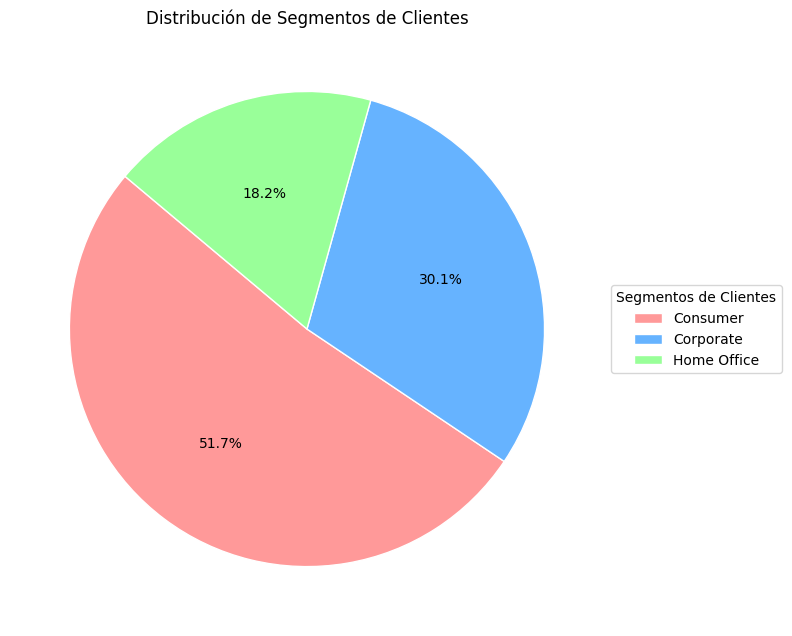

In [6]:
# Cantidad de registros por segmento
segment_distribution = data['Segment'].value_counts()

# Lista de colores para cada segmento
colors = ['#ff9999','#66b3ff','#99ff99']

# Gráfico de torta sin etiquetas en los segmentos
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    segment_distribution,
    labels=None,  # Eliminación de etiquetas de segmentos
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}  # Borde blanco para mejor visualización
)

# Leyenda de cada segmento con su color correspondiente
plt.legend(
    wedges,
    segment_distribution.index,
    title="Segmentos de Clientes",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Distribución de Segmentos de Clientes')
plt.tight_layout()  # Ajuste del layout para que la leyenda no se corte
plt.show()

De este gráfico se desprende que la categoría de clientes que más impacto tienen en la compañía son los "Consumer", posiblemente consumidores o clientes normales o generales los cuales representan casi la mitad de los ingrrsos de la empresa. En cuanto a los otros dos segmentos, obtenemos que "Corporate" ocupa un 30,1% y "Home Office" un 18,2%. Frente a estos datos, es importante entender que la mayor cantidad de clientes son consumidores normales y generales, lo que puede ser información fundamental a la hora de generar estrategias de ventas, o también con el fin de saber en que rubro de clientes dedicar más tiempo.

####Tercer Gráfico
Para el tercer gráfico realizaré un gráfico de líneas con el objetivo de analizar las ventas por cada región. Este gráfico responderá la pregunta: "¿Qué regiones tienen el mayor volumen de ventas?", para lo cual debemos realizar:

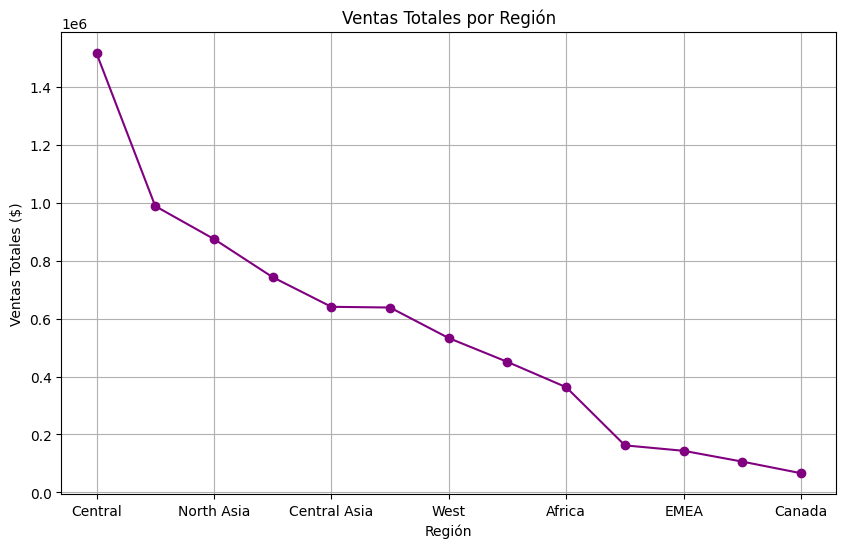

In [7]:
# Agrupar y sumar ventas por región
sales_by_region = data.groupby('Region')['Sales.Total'].sum().sort_values(ascending=False)

# Gráfico de líneas
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='line', marker='o', color='purple')
plt.title('Ventas Totales por Región')
plt.xlabel('Región')
plt.ylabel('Ventas Totales ($)')
plt.grid()
plt.show()

Este gráfico si bien puede no ser el ideal para representar los resultados, creo que gráficamente es muy útil, ya que visualmente podemos obswrvar de una manera sencilla que región es la que más ventas genera y cual es la que menos. A partir de los resultados pueden surgir una variedad de estrategias de marketing para ahondar en mercados menos explotados o desarrollados o como en los casos anteriores dedicar más tiempo en donde la empresa tiene más éxito, en este caso "Central" que hace referencia a América Central. Por otro lado, esto también puede determinar en que lugares del mundo la empresa no ea rentable y en caso de necesidad de recortar gastos podría ser determinante los resultados del análisis para evaluar posible cierres de sucursales.

####Cuarto Gráfico
Para el cuarto gráfico opté por un mapa de calor para analizar el costo de envíos por mercado y por categorías. Este gráfico ayudará a responder la pregunta: "¿Qué mercados o regiones muestran mayores costos de envío?", para ello debemos:

<ipython-input-8-4d9ead006908>:7: FutureWarning: The provided callable <function mean at 0x79925a5f5000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  shipping_cost_by_region_category = data.pivot_table(


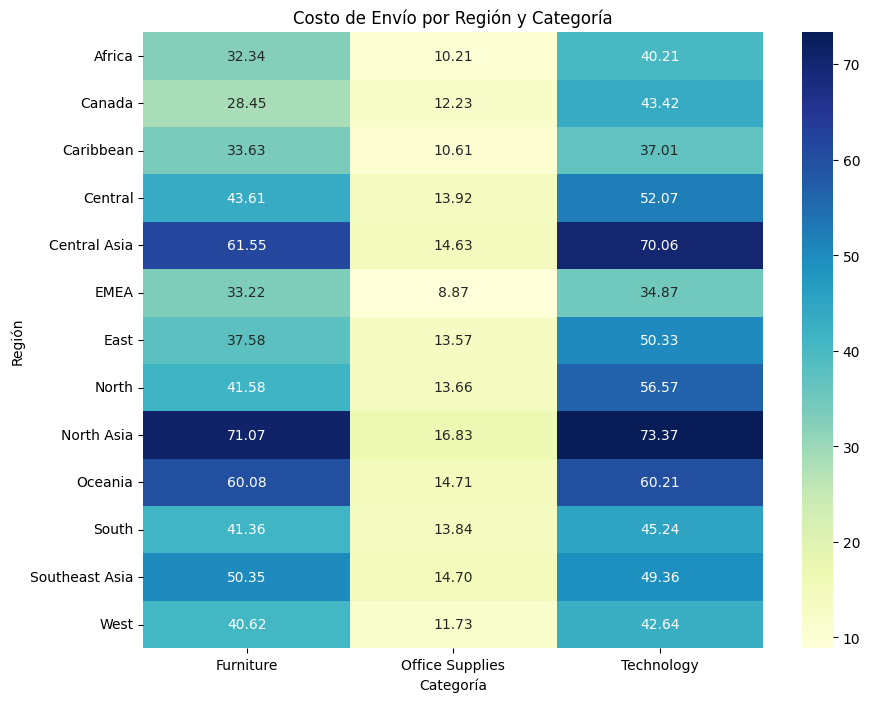

In [8]:
import numpy as np

# Eliminamos el símbolo de la moneda y se convierte la columna 'Shipping.Cost' a tipo numérico
data['Shipping.Cost'] = data['Shipping.Cost'].replace('[\$,]', '', regex=True).astype(float)

# Tabla pivote
shipping_cost_by_region_category = data.pivot_table(
    values='Shipping.Cost',
    index='Region',
    columns='Category',
    aggfunc=np.mean
)

# Gráfico de mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(shipping_cost_by_region_category, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Costo de Envío por Región y Categoría")
plt.xlabel("Categoría")
plt.ylabel("Región")
plt.show()

Del gráfico se desprende el costo de envío por región, algo que puede ser muy útil para diferentes estrategias de la empresa como sea evaluar terciarizar los envíos, ofrecer promociones a los clientes con envío incluido con su compra, y hasta analizar en los casos de alto costo la posibilidad de cambiar de empresa de envíos para ahorrar dinero. También y junto al gráfico anterior, si unimos ambos podríamos determinar que regiones no son rentables y tienen un alto costo de envío algo que podría dar lugar a determinar un cierre de operaciones o la posible mudanza de una sucursal. Por último, cabe mencionar que el costo va deade un color amarillo siendo bajo hasta un color azul profundo para altos costos, siendo visualmente identificables en cada caso.

####Quinto Gráfico
Para el quinto gráfico realizaré un gráfico de dispersión para analizar las ventas y los costos de envío. Este gráfico aborda la hipótesis: "¿Existe alguna relación entre el total de ventas y los costos de envío?". El gráfico de dispersión revelará la relación entre el costo de envío y las ventas totales, con diferentes colores para cada segmento de cliente, ayudando a observar si el costo de envío influye en los ingresos. Para ello debemos:

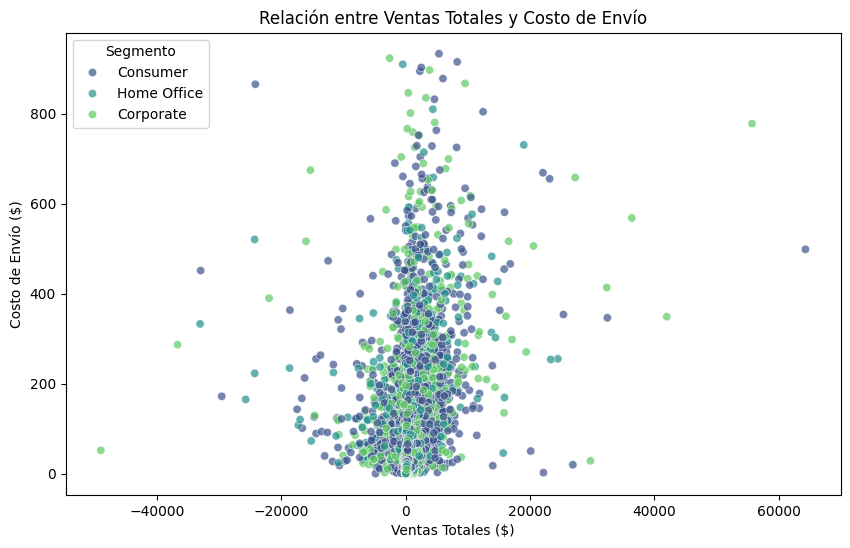

In [9]:
# Gráfico de dispersión para comparar ventas y costo de envío
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Sales.Total', y='Shipping.Cost', hue='Segment', alpha=0.7, palette='viridis')
plt.title('Relación entre Ventas Totales y Costo de Envío')
plt.xlabel('Ventas Totales ($)')
plt.ylabel('Costo de Envío ($)')
plt.legend(title='Segmento')
plt.show()

Del análisis se desprenden valores que llaman poderosamente la atención inclusive valores negativos. A partir de esto opté por verificar la base de datos y detecté que muchos valores de ventas se encuentran con valores negativos, esto puede deberse a situaciones de devolución o anulaciones de compras por parte de los clientes, una situación que podría llamar la atención de la empresa y que debería analizar. No obstante, y para poder compararlo, realicé el mismo gráfico pero con un segundo dataset modificado sin esas operaciones negativas obteniendo el siguiente resultado a continuación comparable visualmente:

Index(['Customer.ID', 'Customer.Name', 'Category', 'City', 'Country',
       'Discount', 'Market', 'Order.Date', 'Order_Time', 'Order.ID',
       'Order.Priority', 'Product.ID', 'Product.Name', 'Sales.Price',
       'Quantity', 'Region', 'Sales.Count', 'Sales.Total', 'Segment',
       'Ship.Date', 'Ship_Time', 'Ship.Mode', 'Shipping.Cost',
       'Shipping.TotalCost', 'State', 'Sub.Category', 'Year'],
      dtype='object')


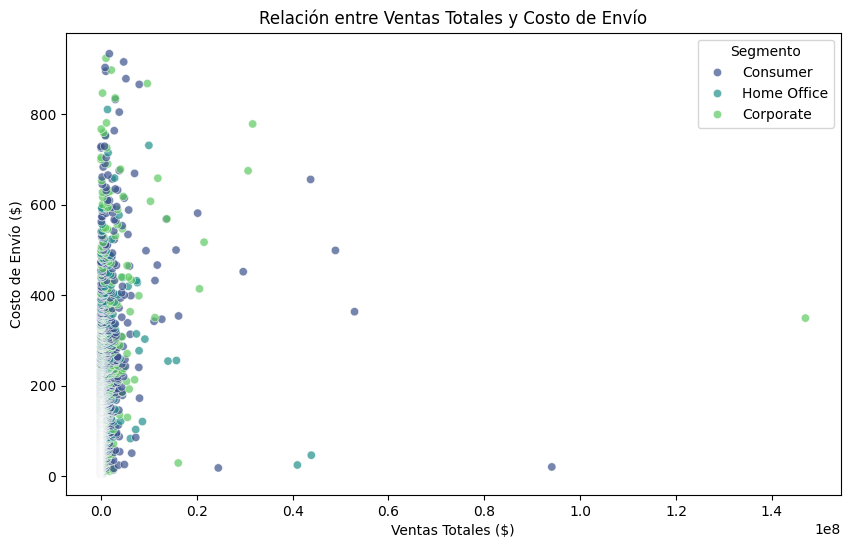

In [15]:
# Cargar el dataset
superstore2 = pd.read_csv('https://raw.githubusercontent.com/spexdj/Data_Science_I/refs/heads/main/superstore2.csv')

# Verificar los nombres de las columnas para asegurarse de que coinciden
print(superstore2.columns)

# Limpiar las columnas en caso de tener caracteres especiales, como '$' o ','
superstore2['Sales.Total'] = superstore2['Sales.Total'].replace('[\$,]', '', regex=True).astype(float)
superstore2['Shipping.Cost'] = superstore2['Shipping.Cost'].replace('[\$,]', '', regex=True).astype(float)

# Gráfico de dispersión para comparar ventas y costo de envío
plt.figure(figsize=(10, 6))
sns.scatterplot(data=superstore2, x='Sales.Total', y='Shipping.Cost', hue='Segment', alpha=0.7, palette='viridis')
plt.title('Relación entre Ventas Totales y Costo de Envío')
plt.xlabel('Ventas Totales ($)')
plt.ylabel('Costo de Envío ($)')
plt.legend(title='Segmento')
plt.show()

####Sexto Gráfico
Para el sexto gráfico voy a realizar un gráfico de cajas para el tiempo de envío según la prioridad de los mismos. Este gráfico de cajas mostrará la distribución del tiempo de envío según la prioridad de la orden, lo que permite visualizar si los pedidos de mayor prioridad tienen tiempos de entrega más rápidos. Además, busco responder a la pregunta: "¿La prioridad de las órdenes afecta el tiempo de entrega?". Para ello debemos:

<ipython-input-14-0baea7a92419>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Order.Priority', y='Shipping.Time', order=sorted_order, palette="Set2")


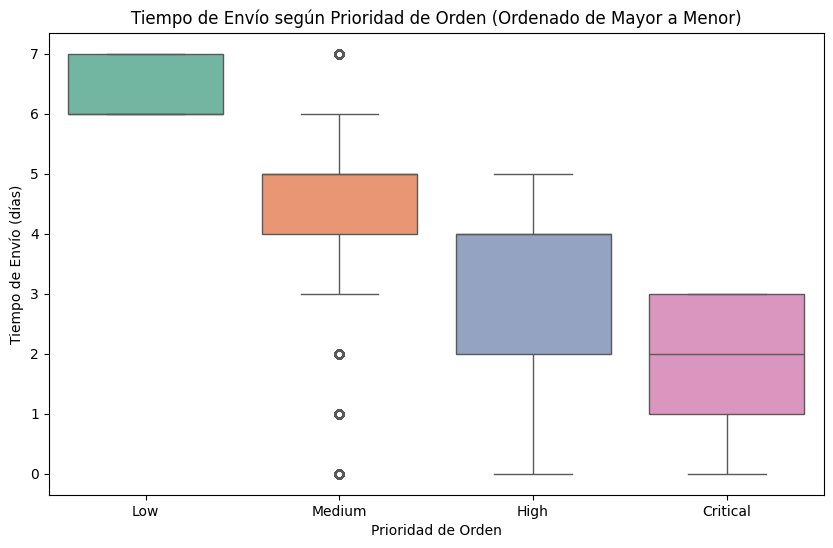

In [14]:
# Conversión de fechas de envío y orden a formato de fecha con el formato adecuado para que lo lea pandas
data['Order.Date'] = pd.to_datetime(data['Order.Date'], dayfirst=True)
data['Ship.Date'] = pd.to_datetime(data['Ship.Date'], dayfirst=True)

# Calculo del tiempo de envío en días
data['Shipping.Time'] = (data['Ship.Date'] - data['Order.Date']).dt.days

# Calculo del tiempo de envío promedio por prioridad de orden
avg_shipping_time = data.groupby('Order.Priority')['Shipping.Time'].mean().reset_index()

# Ordeno las prioridades de orden por el tiempo de envío promedio de mayor a menor (para mejor visualización gráfica)
sorted_order = avg_shipping_time.sort_values(by='Shipping.Time', ascending=False)['Order.Priority'].tolist()

# Creo el gráfico de cajas para analizar tiempo de envío por prioridad, ordenado de mayor a menor
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Order.Priority', y='Shipping.Time', order=sorted_order, palette="Set2")
plt.title('Tiempo de Envío según Prioridad de Orden (Ordenado de Mayor a Menor)')
plt.xlabel('Prioridad de Orden')
plt.ylabel('Tiempo de Envío (días)')
plt.show()

Del último gráfico no hay mucho que sorprenda del análisis, las variables se comportaron como era de esperarse, los envíos con prioridad "Low" son los que más demoran en ser entregados, mientras que los "Critical" son los que menos tiempo demoran. No obstante, es destacable visualizar que en el caso de "Medium" tenemos algunos valores atípicos fuera de rango normal, lo que podría indicar un punto a analizar en profundidad por parte de la empresa y entender porque algunos demoran muy poco tiempo y porque otros demasiado tiempo, evaluando líneas de producción o si hay fallas en el envalado o el proceso de entrega del producto a la empresa de envíos.